In [1]:
using Kinetic, Plots

┌ Info: Kinetic will run with 1 worker, 1 thread and CUDA
└ @ KitBase /home2/vavrines/.julia/packages/KitBase/gyTKv/src/KitBase.jl:85
┌ Info: 1: NVIDIA GeForce RTX 3070
└ @ KitBase /home2/vavrines/.julia/packages/KitBase/gyTKv/src/KitBase.jl:87


config

In [2]:
set = Setup(
    matter = "scalar", # material
    case = "advection", # test case
    space = "1d0f0v", # phase space
    flux = "gks", # flux
    interpOrder = 1,
    boundary = "period", # boundary condition
    cfl = 0.5, # cfl
    maxTime = 1.0, # simulation time
)
ps = PSpace1D(0.0, 1.0, 200, 1)
pr = Scalar(a = 0)
ib = IB((x, p...) -> sin(2π * x), pr)
ks = SolverSet(set, ps, pr, ib);

solution structure

In [3]:
ctr, face = init_fvm(ks);

timestep

In [4]:
dt = timestep(ks, ctr)
nt = ks.set.maxTime ÷ dt |> Int;

iteration

In [5]:
anim = @animate for iter = 1:nt
    reconstruct!(ks, ctr)
    evolve!(ks, ctr, face, dt)
    update!(ks, ctr, face, dt, 0.0)

    plot(ks, ctr, xlabel="x", label="u", ylims=[-1, 1])
end;

┌ Info: Saved animation to /home2/vavrines/Coding/juliacn2022/notebook/advection.gif
└ @ Plots /home2/vavrines/.julia/packages/Plots/kYFLA/src/animation.jl:149


Plots.AnimatedGif("/home2/vavrines/Coding/juliacn2022/notebook/advection.gif")
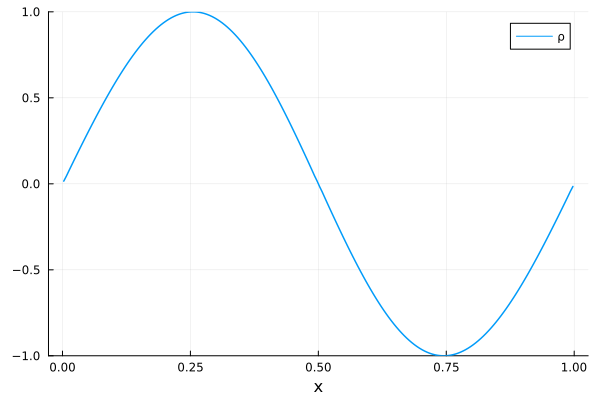

In [6]:
gif(anim, "advection.gif", fps = 45)

Solver with config file input

In [10]:
ks, ctr, face, t = initialize("config.txt");

Kinetic.jl
A Portable Toolbox for Scientific and Neural Computing


--------------------------------------------------------------
matter = scalar # matter
case = advection # case
space = 1d0f0v # phase
flux = gks # gks function
collision = nothing # intermolecular collision
nSpecies = 1 # number of species
interpOrder = 1 # interpolation order of accuracy
limiter = minmod # limiter function
boundary = fix # boundary condition
cfl = 0.5 # CFL number
maxTime = 1.0 # maximal simulation time
x0 = 0
x1 = 1
nx = 200
pMeshType = uniform
nxg = 1
a = 0.0
mu = 1e-6
--------------------------------------------------------------



┌ Info: initializing solver
└ @ KitBase /home2/vavrines/.julia/packages/KitBase/gyTKv/src/Solver/solver_init.jl:16
┌ Info: reading config from config.txt
└ @ KitBase /home2/vavrines/.julia/packages/KitBase/gyTKv/src/IO/io_read.jl:90


In [11]:
solve!(ks, ctr, face, t)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


1.0001233827397598

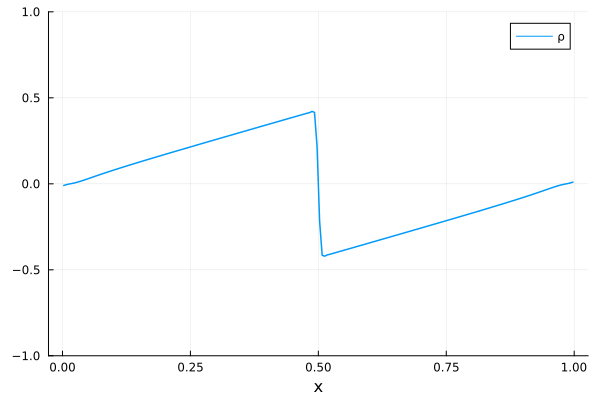

In [12]:
plot(ks, ctr, xlabel="x", label="u", ylims=[-1, 1])